In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [56]:
df=pd.read_csv('employee_data.csv')
df.head()

,Employee_ID,Age,Experience,Salary
0,101,59.0,NaN,59107.0
1,102,NaN,19.0,NaN
2,103,28.0,4.0,66107.0
3,104,NaN,17.0,62587.0
4,105,32.0,23.0,35549.0


In [57]:


df = df.dropna(subset=['Salary'])
age=df['Age'].mean()
exp=df['Experience'].mean()
df['Age']=df['Age'].fillna(age)
df['Experience']=df['Experience'].fillna(exp)
df

,Employee_ID,Age,Experience,Salary
0,101,59.000000,13.6,59107.0
2,103,28.000000,4.0,66107.0
3,104,40.952381,17.0,62587.0
4,105,32.000000,23.0,35549.0
5,106,37.000000,20.0,32538.0
6,107,29.000000,26.0,69295.0
7,108,42.000000,13.6,45467.0
8,109,38.000000,15.0,36550.0
11,112,36.000000,11.0,57913.0
12,113,46.000000,20.0,68803.0


In [58]:
X=df[['Age','Experience']]
y=df['Salary']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# sns.scatterplot(data=X_test,x='Age',y=y_test)
# sns.scatterplot(data=X_test,x='Experience',y=y_test)

X_train

,Age,Experience
12,46.000000,20.0
18,40.000000,13.6
2,28.000000,4.0
27,40.952381,13.6
6,29.000000,26.0
3,40.952381,17.0
17,50.000000,23.0
20,23.000000,9.0
4,32.000000,23.0
5,37.000000,20.0


In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
xscaled=scaler.fit_transform(X_train)
xtest_scale=scaler.transform(X_test)


In [60]:
poly=PolynomialFeatures(degree=1)
xpoly=poly.fit_transform(xscaled)
xtest_poly=poly.transform(xtest_scale)

In [61]:
model=DecisionTreeRegressor()
model.fit(xpoly,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [62]:
pred=model.predict(xtest_poly)
pred

array([60558., 99291., 45467., 45467., 36235.])

In [63]:
model.score(xtest_poly,y_test)

-6.520656819503088

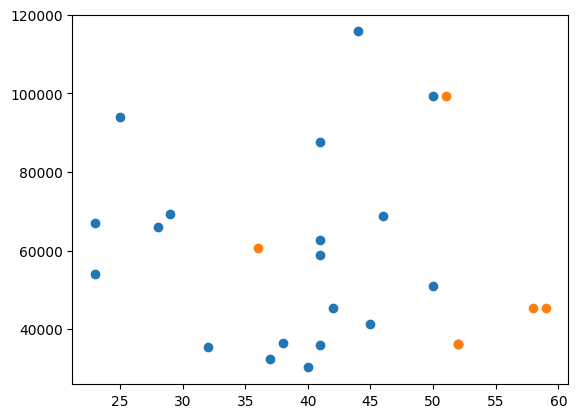

In [64]:
plt.scatter(X_train['Age'],y_train)
plt.scatter(X_test['Age'],pred)
